1. Load and preprocess dataset

In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape images
X_train = X_train.reshape(-1, 32*32*3)
X_test = X_test.reshape(-1, 32*32*3)

# One-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

2025-07-19 22:55:28.234576: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-19 22:55:28.237001: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-19 22:55:28.243894: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752958528.256013   18279 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752958528.259496   18279 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752958528.268381   18279 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

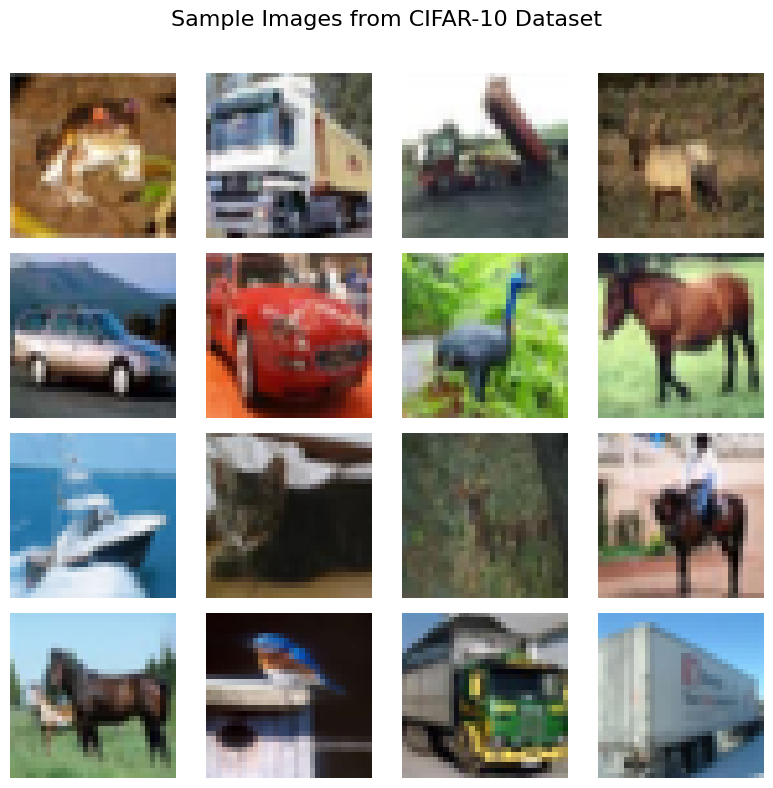

In [2]:
import matplotlib.pyplot as plt

# Display 16 images in a 4x4 grid
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
fig.suptitle('Sample Images from CIFAR-10 Dataset', fontsize=16)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape(32, 32, 3))
    ax.axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

2. Define the Dense model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# In this version, I increased the model's depth
model = Sequential(
    [
        Dense(1024, activation='relu', name = "L1", input_shape=(3072,)),
        Dropout(0.3),
        Dense(512, activation = 'relu', name = "L2"),
        Dropout(0.3),
        Dense(256, activation = 'relu', name = "L3"),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ]
)

3. Compile model

In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

4. Training

In [8]:
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_data=(X_test, y_test))

Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.1982 - loss: 2.2003 - val_accuracy: 0.3446 - val_loss: 1.8601
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.3051 - loss: 1.9070 - val_accuracy: 0.3738 - val_loss: 1.7643
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.3275 - loss: 1.8407 - val_accuracy: 0.3891 - val_loss: 1.7432
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.3424 - loss: 1.8047 - val_accuracy: 0.3968 - val_loss: 1.7422
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.3506 - loss: 1.7854 - val_accuracy: 0.4153 - val_loss: 1.6876
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.3644 - loss: 1.7539 - val_accuracy: 0.4222 - val_loss: 1.6517
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.3740 - loss: 1.7296 - val_accuracy: 0.4289 - val_loss: 1.6624
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.3753 - loss: 1.7211 - 

5. Evaluation and visualization

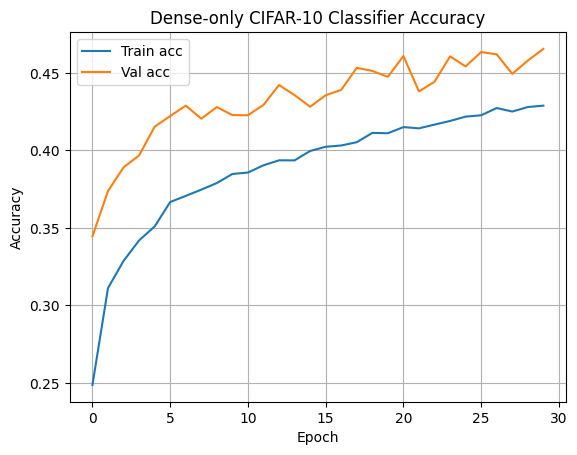

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4691 - loss: 1.5313

Test Accuracy: 46.55%


In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Dense-only CIFAR-10 Classifier Accuracy')
plt.grid(True)
plt.show()

# Evaluación final
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")
